# Context

An experiment on the effects of anti-anxiety medicine on memory recall when being primed with happy or sad memories. The participants were done on novel Islanders whom mimic real-life humans in response to external factors.

Drugs of interest (known-as) [Dosage 1, 2, 3]:

A - Alprazolam (Xanax, Long-term) [1mg/3mg/5mg]

T - Triazolam (Halcion, Short-term) [0.25mg/0.5mg/0.75mg]

S - Sugar Tablet (Placebo) [1 tab/2tabs/3tabs]

*Dosages follow a 1:1 ratio to ensure validity
*Happy or Sad memories were primed 10 minutes prior to testing
*Participants tested every day for 1 week to mimic addiction

Building the Case:
Obstructive effects of Benzodiazepines (Anti-Anxiety Medicine):

Long term adverse effects on Long Term Potentiation of synapses, metacognition and memory recall ability
http://www.jstor.org/stable/43854146
Happy Memories:

research shown positive memories to have a deeper and greater volume of striatum representation under an fMRI
https://www.sciencedirect.com/science/article/pii/S0896627314008484
Sad Memories:

research shown sad memories invokes better memory recall for evolutionary purpose whereas, happy memories are more susceptible to false memories
http://www.jstor.org/stable/40064315
Participants - all genders above 25+ years old to ensure a fully developed pre-frontal cortex, a region responsible for higher level cognition and memory recall.

# QUESTION:

How does anti-anxiety medicine affect you differently by age?
---

# Importing Libraries

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Creating Initial DF

In [38]:
df1 = pd.read_csv('./input/islander_data.csv')
df1.head()

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1


# Checking out what this data is looking like

Data Types
---

In [39]:
df1.dtypes

first_name           object
last_name            object
age                   int64
Happy_Sad_group      object
Dosage                int64
Drug                 object
Mem_Score_Before    float64
Mem_Score_After     float64
Diff                float64
dtype: object

Nulls
---

In [40]:
df1.isnull().sum()

first_name          0
last_name           0
age                 0
Happy_Sad_group     0
Dosage              0
Drug                0
Mem_Score_Before    0
Mem_Score_After     0
Diff                0
dtype: int64

Description
---

In [41]:
df1.describe()

,age,Dosage,Mem_Score_Before,Mem_Score_After,Diff
count,198.000000,198.000000,198.000000,198.000000,198.000000
mean,39.530303,1.989899,57.967677,60.922222,2.954545
std,12.023099,0.818504,15.766007,18.133851,10.754603
min,24.000000,1.000000,27.200000,27.100000,-40.400000
25%,30.000000,1.000000,46.525000,47.175000,-3.175000
50%,37.000000,2.000000,54.800000,56.750000,1.700000
75%,48.000000,3.000000,68.400000,73.250000,5.925000
max,83.000000,3.000000,110.000000,120.000000,49.000000


Dataframe
---

In [42]:
df1

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1
...,...,...,...,...,...,...,...,...,...
193,Jacob,Novak,52,H,3,T,71.3,74.3,3.0
194,Teo,Steiner,41,S,3,T,72.5,70.4,-2.1
195,Alexander,Takahashi,54,S,3,T,30.8,33.1,2.3
196,Alexandere,Takahashi,40,H,3,T,53.6,53.8,0.2


# Exploratory Analysis

Breakdown of age
---

In [43]:
df1['age'].value_counts()

37    13
29    12
34    11
35    11
25    10
28    10
27     9
26     7
38     7
40     7
32     7
33     7
52     6
51     6
50     5
49     5
30     5
54     4
36     4
39     4
48     4
42     4
53     3
46     3
45     3
31     3
43     2
47     2
41     2
62     2
56     2
63     2
65     2
68     2
44     2
83     1
80     1
55     1
59     1
60     1
66     1
69     1
72     1
73     1
24     1
Name: age, dtype: int64

Breakdown of the drugs in the dataset, pretty even distribution
---

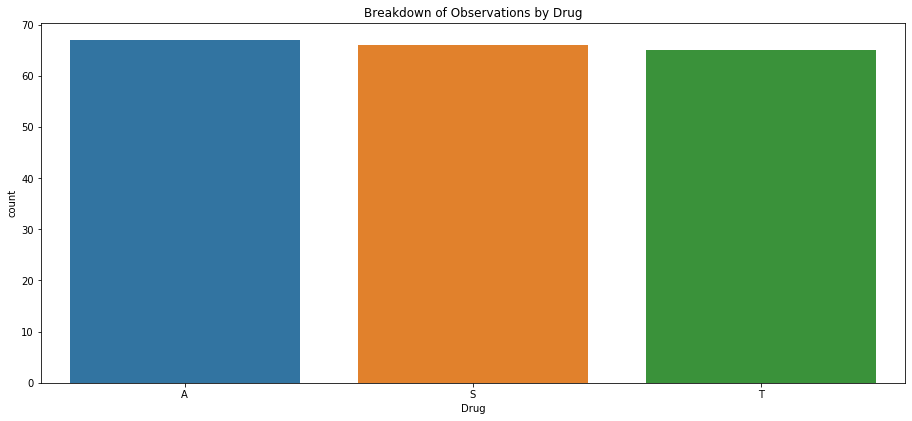

In [69]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(x='Drug', data=df1, ax=ax)
plt.tight_layout()
plt.title('Breakdown of Observations by Drug')
plt.show()

Average difference in memory score for each drug. Includes all ages and all doses.
---

In [45]:
df1.groupby('Drug')['Diff'].mean()

Drug
A    9.470149
S   -0.171212
T   -0.587692
Name: Diff, dtype: float64

Making a new column for a plot. Avg Diff in memory score for all ages and all doses for each drug

In [46]:
df1['avg_ovr_diff'] = df1.groupby('Drug')['Diff'].transform('mean')
df1['avg_ovr_diff']

0      9.470149
1      9.470149
2      9.470149
3      9.470149
4      9.470149
         ...   
193   -0.587692
194   -0.587692
195   -0.587692
196   -0.587692
197   -0.587692
Name: avg_ovr_diff, Length: 198, dtype: float64

Plot

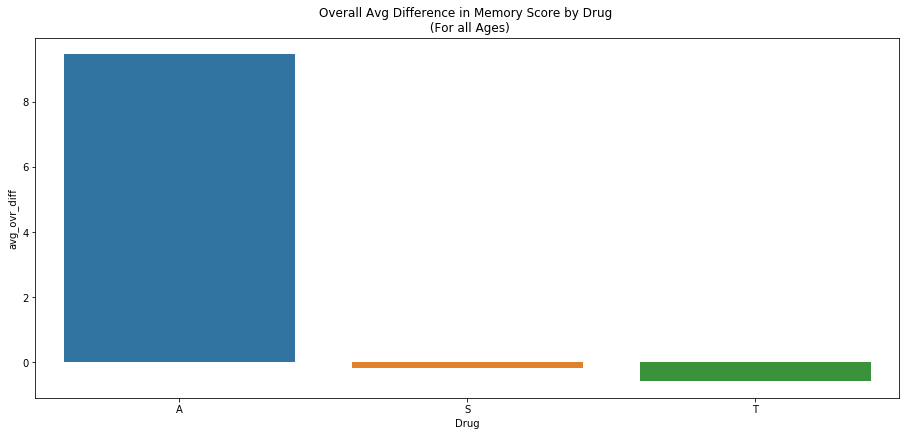

In [72]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.barplot(x=df1['Drug'], y=df1['avg_ovr_diff'], ax=ax)
plt.tight_layout()
plt.title('Overall Avg Difference in Memory Score by Drug \n (For all Ages)')
plt.show()

Time to check out how the drug effects memory by age.
---

Grouping the ages for every 5 years in a new column

In [48]:
df1['age_group'] = pd.cut(
    df1['age'],
    np.arange(start=df1['age'].min(), step=5, stop=df1['age'].max())
)
df1[['age', 'age_group']].head()

,age,age_group
0,25,"(24, 29]"
1,52,"(49, 54]"
2,29,"(24, 29]"
3,50,"(49, 54]"
4,52,"(49, 54]"


In [49]:
df1.head()

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff,avg_ovr_diff,age_group
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3,9.470149,"(24, 29]"
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9,9.470149,"(49, 54]"
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6,9.470149,"(24, 29]"
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5,9.470149,"(49, 54]"
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1,9.470149,"(49, 54]"


Making a new column for the average memory score difference by age group

In [50]:
df1['avg_age_diff'] = df1.groupby('age_group')['Diff'].transform('mean')
df1[['age_group', 'avg_age_diff']].head()

,age_group,avg_age_diff
0,"(24, 29]",2.710417
1,"(49, 54]",4.658333
2,"(24, 29]",2.710417
3,"(49, 54]",4.658333
4,"(49, 54]",4.658333


Checking out the breakdown of observations by age group.

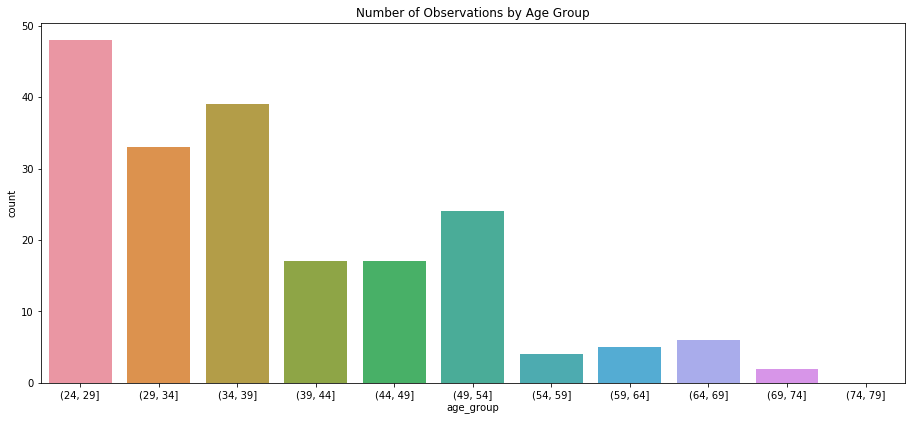

In [74]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(x='age_group', data=df1, ax=ax)
plt.title('Number of Observations by Age Group')
plt.tight_layout()
plt.show()

Note: This plot is not specific to any drug. This shows how each age group, on average, by the anxiety drugs (including the placebo)

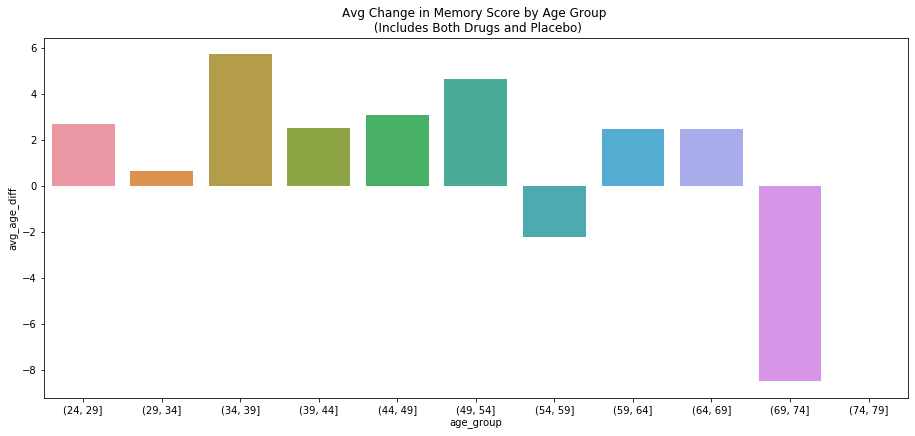

In [75]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.barplot(x=df1['age_group'], y=df1['avg_age_diff'], ax=ax)
plt.title('Avg Change in Memory Score by Age Group \n (Includes Both Drugs and Placebo)')
plt.tight_layout()
plt.show()

This is all great, but lets check out how each age group is effected by each drug.

To analyze each drug seperately, I am going to make a seperate DF for each.
---

Alprazolam Dataframe

In [57]:
alprazolam_df = df1.loc[df1['Drug'] == 'A']
alprazolam_df

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff,avg_ovr_diff,age_group,avg_age_diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3,9.470149,"(24, 29]",2.710417
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9,9.470149,"(49, 54]",4.658333
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6,9.470149,"(24, 29]",2.710417
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5,9.470149,"(49, 54]",4.658333
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1,9.470149,"(49, 54]",4.658333
...,...,...,...,...,...,...,...,...,...,...,...,...
62,Ariane,Steiner,27,S,3,A,54.0,60.0,6.0,9.470149,"(24, 29]",2.710417
63,Naoto,Steiner,39,H,3,A,61.6,88.5,26.9,9.470149,"(34, 39]",5.725641
64,Jade,Summers,40,S,3,A,59.8,79.7,19.9,9.470149,"(39, 44]",2.517647
65,Kevin,Takahashi,34,H,3,A,64.1,90.0,25.9,9.470149,"(29, 34]",0.651515


Triazolam Dataframe

In [58]:
triazolam_df = df1.loc[df1['Drug'] == 'T']
triazolam_df

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff,avg_ovr_diff,age_group,avg_age_diff
133,Ross,Bernard,37,S,1,T,46.9,46.9,0.0,-0.587692,"(34, 39]",5.725641
134,Bastian,Carrasco,27,H,1,T,51.4,51.4,0.0,-0.587692,"(24, 29]",2.710417
135,Daniel,Carrasco,28,H,1,T,50.5,56.8,6.3,-0.587692,"(24, 29]",2.710417
136,Jun,Carrasco,30,S,1,T,50.0,42.2,-7.8,-0.587692,"(29, 34]",0.651515
137,William,Carrasco,62,H,1,T,96.0,102.0,6.0,-0.587692,"(59, 64]",2.460000
...,...,...,...,...,...,...,...,...,...,...,...,...
193,Jacob,Novak,52,H,3,T,71.3,74.3,3.0,-0.587692,"(49, 54]",4.658333
194,Teo,Steiner,41,S,3,T,72.5,70.4,-2.1,-0.587692,"(39, 44]",2.517647
195,Alexander,Takahashi,54,S,3,T,30.8,33.1,2.3,-0.587692,"(49, 54]",4.658333
196,Alexandere,Takahashi,40,H,3,T,53.6,53.8,0.2,-0.587692,"(39, 44]",2.517647


Sugar Tablet Dataframe

In [60]:
sugar_df = df1.loc[df1['Drug'] == 'S']
sugar_df

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff,avg_ovr_diff,age_group,avg_age_diff
67,Ami,Carrasco,26,H,1,S,75.0,73.3,-1.7,-0.171212,"(24, 29]",2.710417
68,Jose,Carrasco,29,H,1,S,90.0,90.0,0.0,-0.171212,"(24, 29]",2.710417
69,Mai,Carrasco,56,S,1,S,49.2,64.2,15.0,-0.171212,"(54, 59]",-2.225000
70,Yuta,Carrasco,28,H,1,S,54.5,53.6,-0.9,-0.171212,"(24, 29]",2.710417
71,Marianne,Connolly,51,H,1,S,49.3,56.7,7.4,-0.171212,"(49, 54]",4.658333
...,...,...,...,...,...,...,...,...,...,...,...,...
128,Chloe,Steiner,28,S,3,S,69.7,71.9,2.2,-0.171212,"(24, 29]",2.710417
129,Nik,Summers,38,H,3,S,88.7,96.0,7.3,-0.171212,"(34, 39]",5.725641
130,Tobias,Summers,43,S,3,S,49.3,52.7,3.4,-0.171212,"(39, 44]",2.517647
131,Anna,Takahashi,45,H,3,S,81.9,80.6,-1.3,-0.171212,"(44, 49]",3.064706


Great, now let's see how each drug effects memory test scores by age group.
---

Changing the "avg_age_diff" column for each seperate drug df to be specific to that drug rather than all of the drugs overall.

In [61]:
alprazolam_df['avg_age_diff'] = alprazolam_df.groupby('age_group')['Diff'].transform('mean')
alprazolam_df[['age_group', 'avg_age_diff']].head()

,age_group,avg_age_diff
0,"(24, 29]",4.4875
1,"(49, 54]",8.3000
2,"(24, 29]",4.4875
3,"(49, 54]",8.3000
4,"(49, 54]",8.3000


Lets plot the average memory difference for each age group that took Alprazolam.

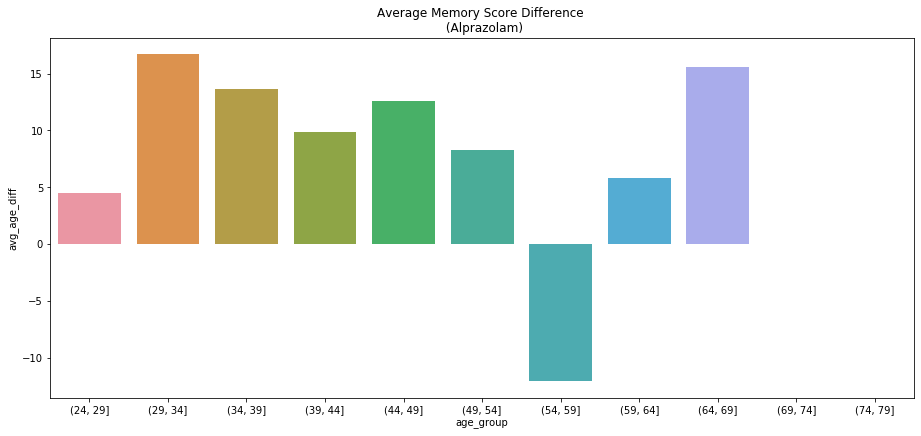

In [76]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.barplot(x=alprazolam_df['age_group'], y=alprazolam_df['avg_age_diff'], ax=ax)
plt.title('Average Memory Score Difference \n (Alprazolam)')
plt.tight_layout()
plt.show()

Sweet, now let's do Triazolam.

In [64]:
triazolam_df['avg_age_diff'] = triazolam_df.groupby('age_group')['Diff'].transform('mean')
triazolam_df[['age_group', 'avg_age_diff']].head()

,age_group,avg_age_diff
133,"(34, 39]",-0.788889
134,"(24, 29]",1.223077
135,"(24, 29]",1.223077
136,"(29, 34]",-1.833333
137,"(59, 64]",0.233333


And the plot...

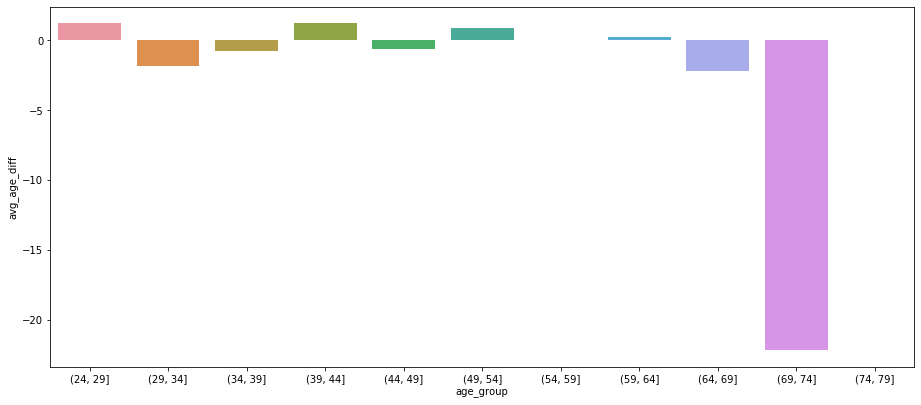

In [65]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.barplot(x=triazolam_df['age_group'], y=triazolam_df['avg_age_diff'], ax=ax)
plt.plot('Average Memory Score Difference \n (Triazolam)')
plt.tight_layout()
plt.show()

Interesting, Triazolam seems to not effect memory scores nearly as much as Alprazolam, except for older folks.

Now time for the placebo

In [66]:
sugar_df['avg_age_diff'] = sugar_df.groupby('age_group')['Diff'].transform('mean')
sugar_df[['age_group', 'avg_age_diff']].head()

,age_group,avg_age_diff
67,"(24, 29]",2.231579
68,"(24, 29]",2.231579
69,"(54, 59]",7.650000
70,"(24, 29]",2.231579
71,"(49, 54]",-0.240000


And the plot...

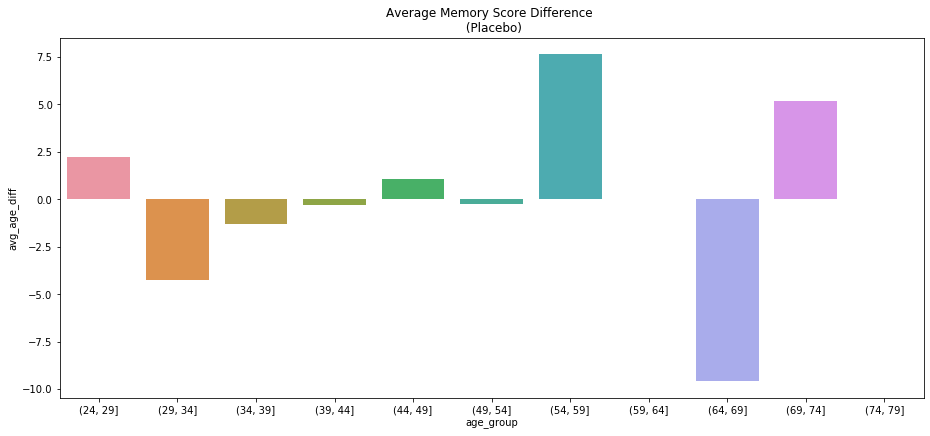

In [77]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.barplot(x=sugar_df['age_group'], y=sugar_df['avg_age_diff'], ax=ax)
plt.title('Average Memory Score Difference \n (Placebo)')
plt.tight_layout()
plt.show()